In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Since cab_rides is taking a large memory, let's use memory saving function
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [3]:
#Taking the required files and reducing its memory
weather_data=pd.read_csv("C:/Users/ASUS/Downloads/weather.csv")
weather_data=reduce_mem_usage(weather_data)
cab_data=pd.read_csv("C:/Users/ASUS/Downloads/cab_rides.csv")
cab_data=reduce_mem_usage(cab_data)

Memory usage after optimization is: 0.10 MB
Decreased by 73.3%
Memory usage after optimization is: 36.62 MB
Decreased by 30.8%


In [4]:
#Viewing the first five rows of the data
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [5]:
#Viewing the columns of cab data
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [6]:
#Viewing teh columns od weather data
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [7]:
#Coverting string to real date and time
import datetime
cab_data['date_time']=pd.to_datetime(cab_data['time_stamp'])
weather_data['date_time']=pd.to_datetime(weather_data['time_stamp'])

In [8]:
#Finding no of rows and columns od cab data
cab_data.shape

(693071, 11)

In [9]:
#Finding no of rows and columns of weather data
weather_data.shape

(6276, 9)

In [10]:
#Understnding cab data statistically
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.0,693071.0
mean,NaN,1.544046e+12,NaN,NaN
std,0.000000,6.891925e+08,0.0,0.0
min,0.020004,1.543204e+12,2.5,1.0
25%,1.280273,1.543444e+12,9.0,1.0
50%,2.160156,1.543737e+12,13.5,1.0
75%,2.919922,1.544828e+12,22.5,1.0
max,7.859375,1.545161e+12,97.5,3.0


In [11]:
#Understnding weather data statistically
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,inf,0.677734,inf,0.057648,1.543857e+09,0.764160,6.800781
std,6.019531,0.314453,12.875,0.100769,6.659340e+05,0.127319,3.632812
min,19.625000,0.000000,988.000,0.000200,1.543204e+09,0.449951,0.290039
25%,36.085938,0.439941,997.875,0.004902,1.543387e+09,0.669922,3.517090
50%,40.125000,0.779785,1007.500,0.014847,1.543514e+09,0.759766,6.570312
75%,42.843750,0.970215,1018.500,0.060913,1.544691e+09,0.890137,9.921875
max,55.406250,1.000000,1035.000,0.780762,1.545159e+09,0.990234,18.187500


In [12]:
#Joining both the datas
a=pd.concat([cab_data,weather_data])

In [13]:
#Viewing the combination of cab data and weather data
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Getting day and hour from the timestamp
a['day']=a.date_time.dt.day
a['hour']=a.date_time.dt.hour

In [15]:
#Viewing last 5 rows of the data
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,day,hour
6271,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.71875,North Station,0.890137,1000.5,NaN,0.959961,1.519531,1,0
6272,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.84375,Northeastern University,0.879883,1000.5,NaN,0.959961,1.540039,1,0
6273,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.81250,South Station,0.890137,1000.5,NaN,0.959961,1.540039,1,0
6274,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.78125,Theatre District,0.890137,1000.5,NaN,0.959961,1.540039,1,0
6275,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.68750,West End,0.890137,1000.5,NaN,0.959961,1.519531,1,0


In [16]:
# Fill missing values with 0 for 'distance' column
a['distance'].fillna(0, inplace=True)

# Fill missing values with 0 for 'time_stamp' column
a['time_stamp'].fillna(0, inplace=True)

# Fill missing values with 0 for 'price' column
a['price'].fillna(0, inplace=True)

# Fill missing values with 0 for 'surge_multiplier' column
a['surge_multiplier'].fillna(0, inplace=True)

# Fill missing values with 0 for 'date_time' column
a['date_time'].fillna(0, inplace=True)

# Fill missing values with 0 for 'temp' column
a['temp'].fillna(0, inplace=True)

# Fill missing values with 0 for 'clouds' column
a['clouds'].fillna(0, inplace=True)

# Fill missing values with 0 for 'pressure' column
a['pressure'].fillna(0, inplace=True)

# Fill missing values with 0 for 'rain' column
a['rain'].fillna(0, inplace=True)

# Fill missing values with 0 for 'humidity' column
a['humidity'].fillna(0, inplace=True)

# Fill missing values with 0 for 'wind' column
a['wind'].fillna(0, inplace=True)

# Fill missing values with 0 for 'day' column
a['day'].fillna(0, inplace=True)

# Fill missing values with 0 for 'hour' column
a['hour'].fillna(0, inplace=True)

In [17]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

In [18]:
#Provinding groups based on the columns
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,day,hour
cab_type,,,,,,,,,,,,,,,,,,,
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,0,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,0,385663,385663,385663,385663,385663,385663,385663


<Axes: xlabel='cab_type'>

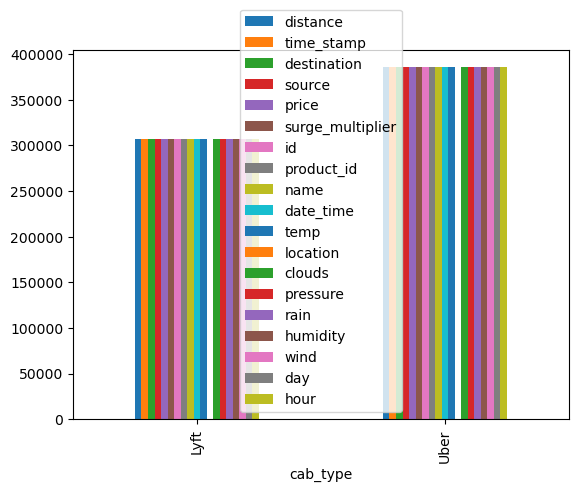

In [19]:
#Plotting a bar diagram based on cab type
a.groupby('cab_type').count().plot.bar()

<Axes: >

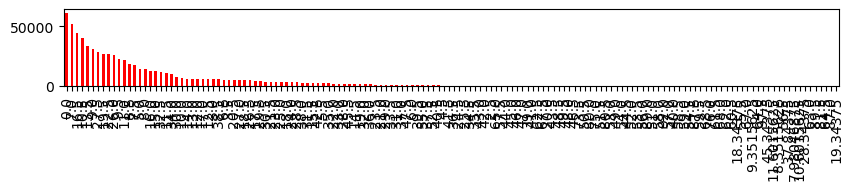

In [20]:
#Plotting a bar diagram based on price
a['price'].value_counts().plot(kind="bar",figsize=(10,1),color="red")

<Axes: >

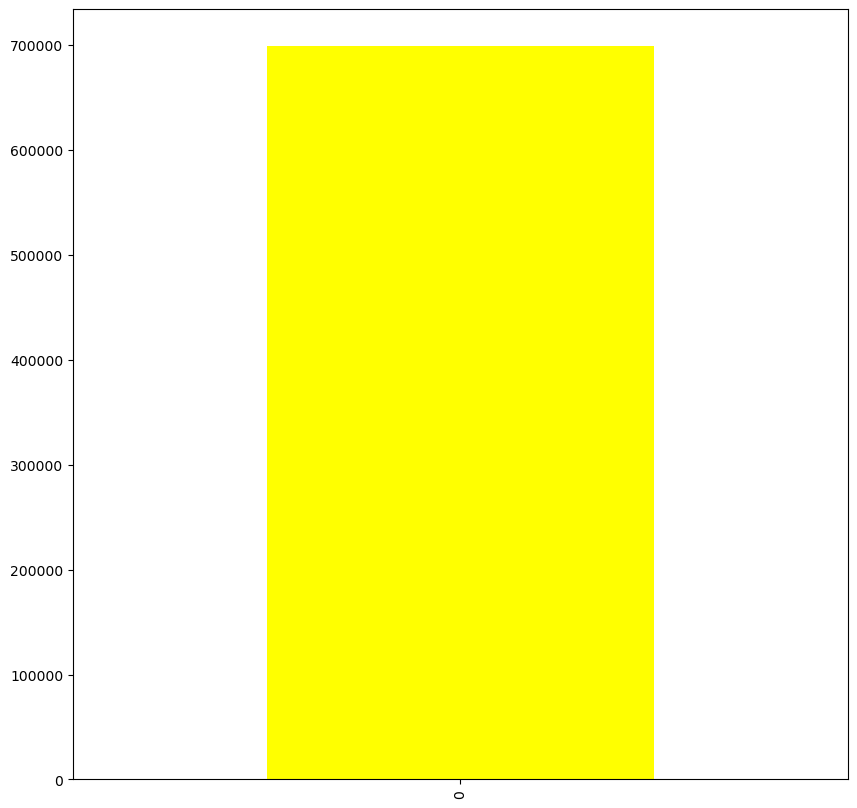

In [21]:
#Plotting a bar diagram based on hour
a['hour'].value_counts().plot(kind="bar",figsize=(10,10),color="yellow")

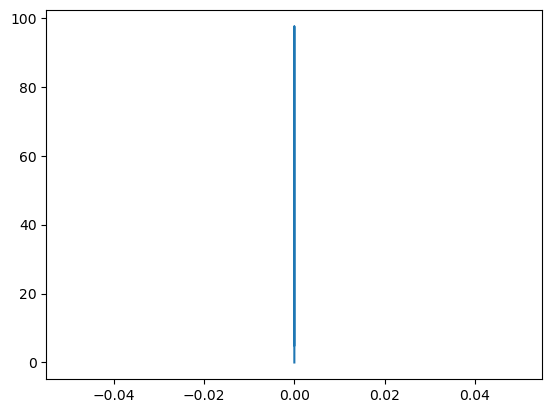

In [22]:
#Analyzing the connection between hour and price
x=a['hour']
y=a['price']
plt.plot(x,y)
plt.show()

In [23]:
#Making our model
x1=a[['distance','temp','rain','clouds','pressure','humidity','wind','day','hour','surge_multiplier']]
y1=a['price']

In [24]:
#Splitting data into training and tetsing data using sklearn
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(x1, y1, test_size=0.25,random_state=42)

In [26]:
linear=LinearRegression()
linear.fit(x_train,x_test)

LinearRegression()

In [27]:
predictions=linear.predict(y_train)
predictions

array([32.5459531 , 14.75718428, 16.81492884, ..., 11.82962017,
       11.85447216, 13.22878706])

In [31]:
#Finding diffence between our predictions and actual values
df=pd.DataFrame({'Actual': y_test,'Predicted':predictions})
df

,Actual,Predicted
81607,42.5,32.545953
354,0.0,14.757184
471801,32.5,16.814929
407645,27.5,10.480157
474760,27.5,10.556577
...,...,...
538489,7.5,10.708796
579511,13.5,15.517655
5421,9.0,11.829620
279982,8.0,11.854472


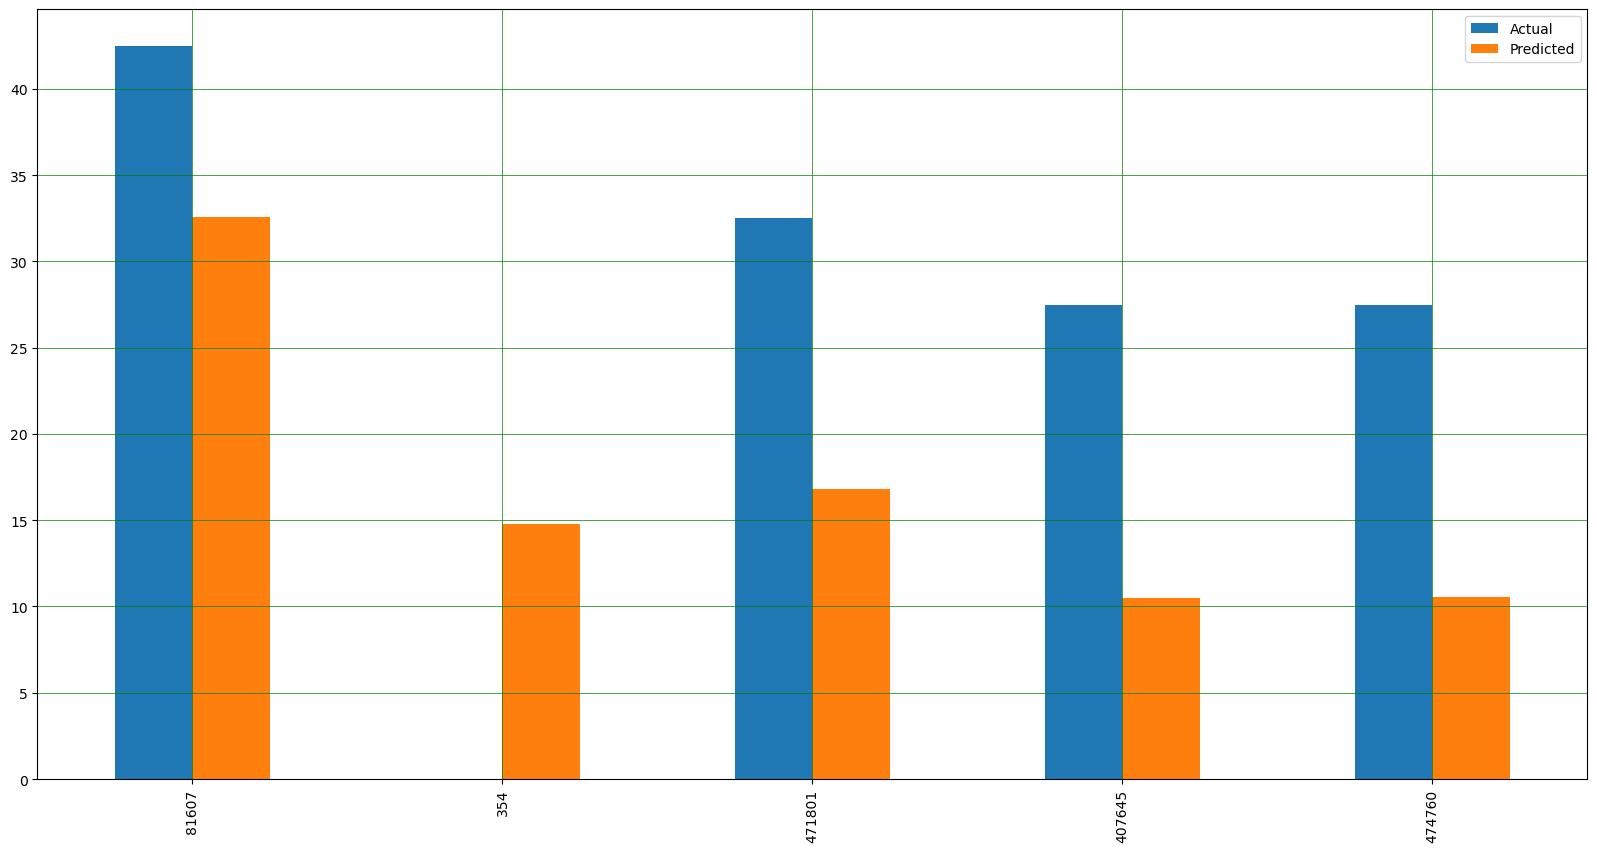

In [32]:
df1=df.head()
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which="major",linestyle='-',linewidth=0.5,color='green')
plt.grid(which="minor",linestyle=':',linewidth=0.5,color='blue')